In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [12]:
plt.rcParams['figure.dpi'] = 150 

In [13]:
from matplotlib.patches import Ellipse  # elipse plot for EM-Model
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        ax.scatter(pos[0],pos[1], color= "red",edgecolor='black',marker="*",  s=200 , alpha=1, zorder=10)

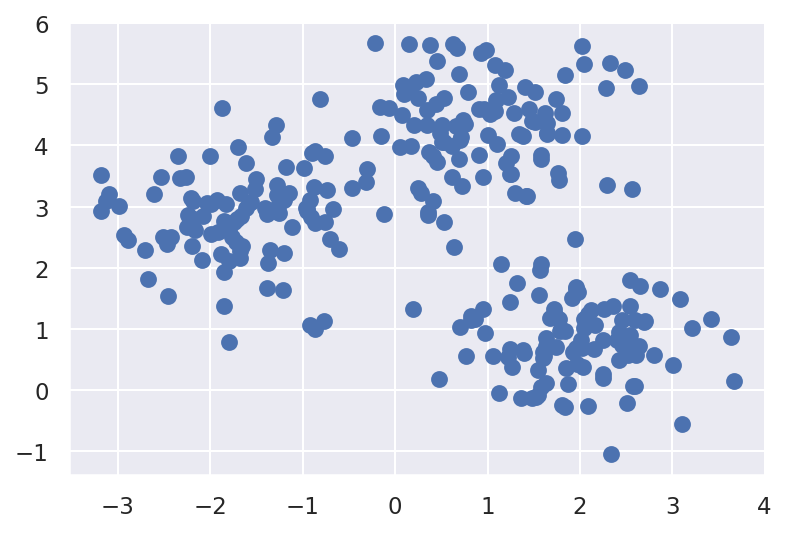

In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=300, n_features=2,
   centers=3, cluster_std=0.7,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1], s=50
)
plt.show()

In [15]:
from sklearn.mixture import GaussianMixture 
gmm = GaussianMixture(n_components=3, n_init=10)

In [16]:
y_labels= gmm.fit_predict(X)

In [17]:
y_labels

array([1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0,
       0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2,
       1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2,
       1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 2, 1, 1, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0,
       2, 2, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0,
       1, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1])

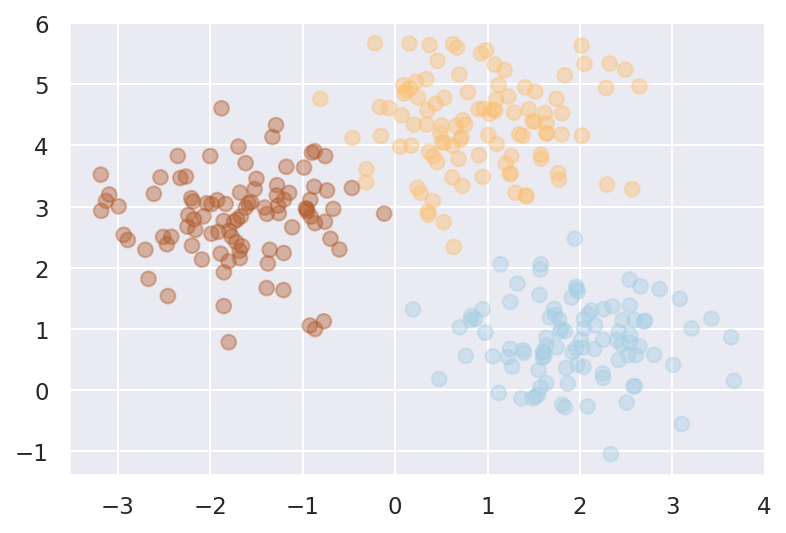

In [18]:
plt.scatter(X[:,0], X[:,1], c=y_labels, s=50, cmap=plt.cm.Paired, alpha=0.4)

In [19]:
gmm.covariances_

array([[[ 0.45478445, -0.02177215],
        [-0.02177215,  0.38974763]],

       [[ 0.54259044,  0.02648425],
        [ 0.02648425,  0.55156498]],

       [[ 0.497544  ,  0.01901903],
        [ 0.01901903,  0.51123793]]])

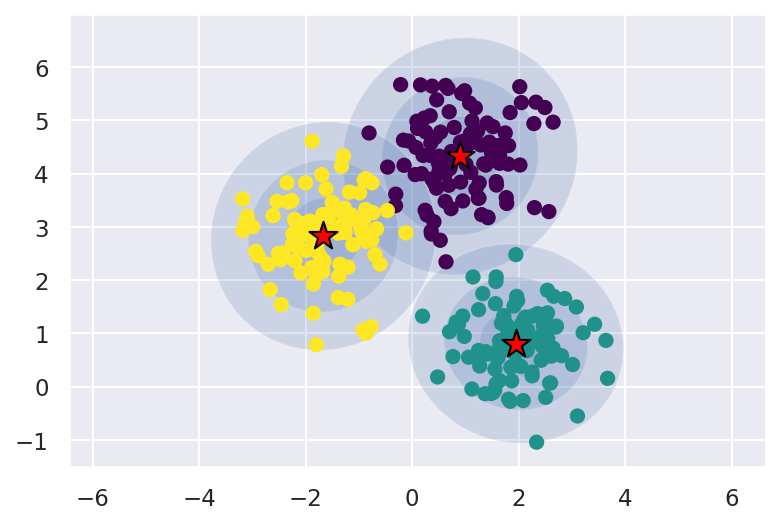

In [20]:
plot_gmm(gmm, X)

In [21]:
index= []
bic = []
for i in range(1,11):
    gmm = GaussianMixture(n_components=i, n_init=10)
    gmm.fit(X)
    index.append(i)
    bic.append(gmm.bic(X))

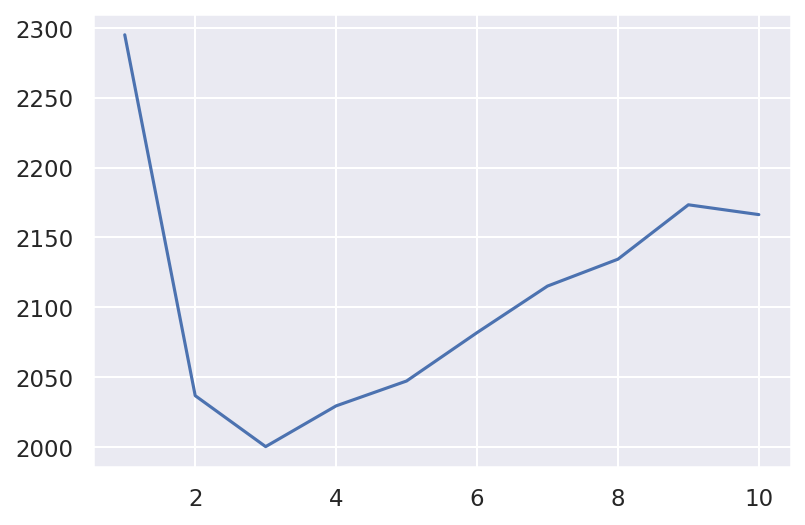

In [22]:
plt.plot(index,bic)